# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world.
You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.
The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.
The rating scale is from 1-5, as described in this [review guide](http://flavorsofcacao.com/review_guide.html). A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.
Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

In [26]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Make Some Chocolate Soup

Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we not want to scrape?

[Flavors of Cacao](http://flavorsofcacao.com)


Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

The URL is:
https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

You can pass this into the .get() method of the requests module to get the HTML.

In [27]:
webpage = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")

Create a BeautifulSoup object called soup to traverse this HTML.

Use "html.parser" as the parser, and the content of the response you got from your request as the document.

In [28]:
soup = BeautifulSoup(webpage.content, "html.parser")

If you want, print out the soup object to explore the HTML.

So many table rows! You’re probably very relieved that we don’t have to scrape this information by hand.

In [29]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

## How are ratings distributed?

How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

Use a command on the soup object to get all of the tags that contain the ratings.

In [30]:
chocolate_rates = soup.find_all(attrs={"class": "Rating"})

Create an empty list called ratings to store all the ratings in.

In [31]:
ratings = []

Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [32]:
for rate in chocolate_rates[1:]:
    r = float(rate.get_text())
    ratings.append(r)

Using Matplotlib, create a histogram of the ratings values:

plt.hist(ratings)

Remember to show the plot using plt.show()!

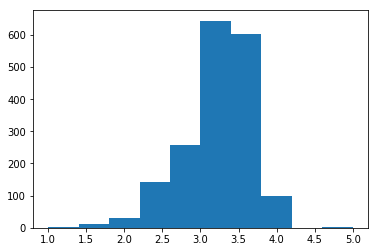

In [33]:
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

In [34]:
company_tags = soup.select(".Company")

Just like we did with ratings, we now want to make an empty list to hold company names

In [35]:
company_name = []

Loop through the tags containing company names, and add the text from each tag to the list you just created.

In [36]:
for td in company_tags[1:]:
    company_name.append(td.get_text())

Create a DataFrame with a column “Company” corresponding to your companies list, and a column “Ratings” corresponding to your ratings list.

In [37]:
df = pd.DataFrame({"Company": company_name, "Ratings": ratings})
df.head()

,Company,Ratings
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50


Use .groupby to group your DataFrame by Company and take the average of the grouped ratings.

Then, use the .nlargest command to get the 10 highest rated chocolate companies. Print them out.

Look at the hint if you get stuck on this step!

In [38]:
df_group_company = df.groupby("Company").Ratings.mean()
df_group_company = df_group_company.nlargest(10)
df_group_company

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64

## Is more cacao better?


We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao.

It looks like the cocoa percentages are in the table under the Cocoa Percent column.

Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as an integer, after stripping off the % character.

In [39]:
cocoa_percentage = []

cocoa_percent_tags = soup.select(".CocoaPercent")

for td in cocoa_percent_tags[1:]:
  percent = float(td.get_text().strip('%'))
  cocoa_percentage.append(percent)


Add the cocoa percentages as a column called "CocoaPercentage" in the DataFrame that has companies and ratings in it.

In [40]:
df['Percentage'] = cocoa_percentage
df

,Company,Ratings,Percentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0
5,A. Morin,2.75,70.0
6,A. Morin,3.50,70.0
7,A. Morin,3.50,70.0
8,A. Morin,3.75,70.0
9,A. Morin,4.00,70.0


Make a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage).

You can do this in Matplotlib with these commands:
    
    plt.scatter(df.CocoaPercentage, df.Rating)
    plt.show()

Call plt.clf() to clear the figure between showing your histogram and this scatterplot.

Remember that your plots will show up at the address localhost in the web browser.

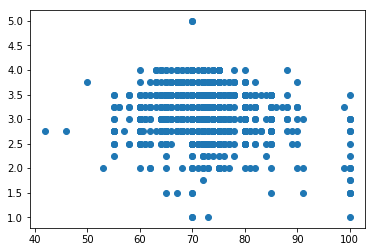

In [41]:
plt.scatter(df.Percentage, df.Ratings)
plt.show()


Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

Copy this code and paste it after you create the scatterplot, but before you call .show():

    z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
    line_function = np.poly1d(z)
    plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")

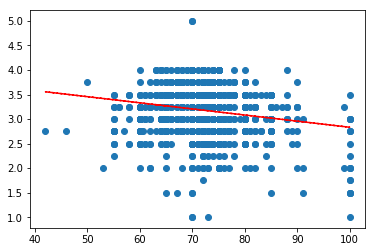

In [42]:
plt.scatter(df.Percentage, df.Ratings)
z = np.polyfit(df.Percentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.Percentage, line_function(df.Percentage), "r--")
plt.show()

We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.

For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

Let's add company location

In [45]:
company_location = []

company_location_tags = soup.select(".CompanyLocation")

for td in company_location_tags[1:]:
    company_location.append(td.get_text())

In [47]:
df['Company Location'] = company_location
df.head()

,Company,Ratings,Percentage,Company Location
0,A. Morin,3.75,63.0,France
1,A. Morin,2.75,70.0,France
2,A. Morin,3.00,70.0,France
3,A. Morin,3.50,70.0,France
4,A. Morin,3.50,70.0,France


In [50]:
#which countries produce the highest-rated bards?
df_group_location = df.groupby("Company Location").Ratings.max()
df_group_location = df_group_location.nlargest(10)
df_group_location

Company Location
Italy        5.0
Australia    4.0
Belgium      4.0
Brazil       4.0
Canada       4.0
Colombia     4.0
Ecuador      4.0
France       4.0
Germany      4.0
Guatemala    4.0
Name: Ratings, dtype: float64